In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import fanalysis as fa

In [5]:
df = pd.read_excel('vote_clustering_train.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   budget      335 non-null    object
 1   physician   335 non-null    object
 2   salvador    335 non-null    object
 3   nicaraguan  335 non-null    object
 4   missile     335 non-null    object
 5   education   335 non-null    object
dtypes: object(6)
memory usage: 15.8+ KB


In [7]:
df.describe()


,budget,physician,salvador,nicaraguan,missile,education
count,335,335,335,335,335,335
unique,3,3,3,3,3,3
top,y,n,n,y,y,n
freq,194,192,165,191,165,180


In [9]:
# fréquences des modalités Fréquences des values par colonne
df.apply(axis=0,func=lambda x:x.value_counts())

,budget,physician,salvador,nicaraguan,missile,education
n,133,192,165,131,154,180
neither,8,10,9,13,16,28
y,194,133,161,191,165,127


In [10]:
from fanalysis.mca import MCA
mca = MCA(row_labels=df.index)
mca.fit(df.values)

mca.eig_


array([[7.43441284e-01, 3.79687913e-01, 1.74117626e-01, 1.34147542e-01,
        1.24902832e-01, 1.20304898e-01, 8.62967703e-02, 7.47046087e-02,
        5.97803489e-02, 4.28345402e-02, 3.57503159e-02, 2.40313202e-02],
       [3.71720642e+01, 1.89843957e+01, 8.70588128e+00, 6.70737712e+00,
        6.24514161e+00, 6.01524491e+00, 4.31483852e+00, 3.73523044e+00,
        2.98901744e+00, 2.14172701e+00, 1.78751580e+00, 1.20156601e+00],
       [3.71720642e+01, 5.61564599e+01, 6.48623412e+01, 7.15697183e+01,
        7.78148599e+01, 8.38301048e+01, 8.81449433e+01, 9.18801737e+01,
        9.48691912e+01, 9.70109182e+01, 9.87984340e+01, 1.00000000e+02]])

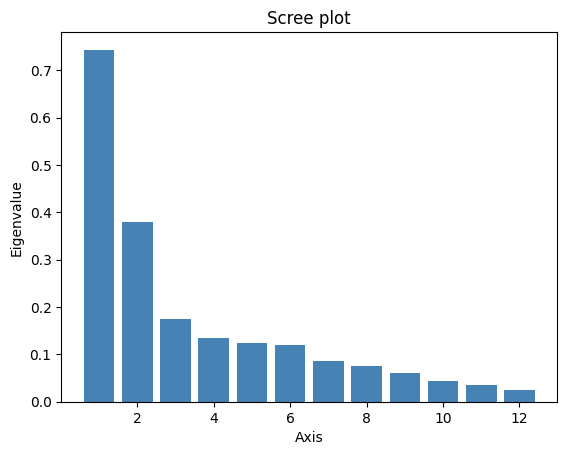

In [13]:
mca.plot_eigenvalues()

# Importation et inspection des données

In [ ]:
#changement de dossier
# import os
# os.chdir("C:/Users/ricco/Desktop/demo")

#chargement des données
import pandas
vote = pandas.read_excel("vote_clustering_train.xlsx")
vote.head()

/var/folders/fj/25hghm0n7n33b98vlpmy81dm0000gn/T/ipykernel_9580/3045900847.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


,budget,physician,salvador,nicaraguan,missile,education
0,n,y,y,n,n,y
1,y,n,n,y,y,n
2,y,n,n,y,y,n
3,y,n,n,y,y,n
4,y,y,y,y,n,n


In [ ]:
#info
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   budget      335 non-null    object
 1   physician   335 non-null    object
 2   salvador    335 non-null    object
 3   nicaraguan  335 non-null    object
 4   missile     335 non-null    object
 5   education   335 non-null    object
dtypes: object(6)
memory usage: 15.8+ KB


In [ ]:
#stat. descriptives
vote.describe()

,budget,physician,salvador,nicaraguan,missile,education
count,335,335,335,335,335,335
unique,3,3,3,3,3,3
top,y,n,n,y,y,n
freq,194,192,165,191,165,180


In [ ]:
#fréquences des modalités
vote.apply(axis=0,func=lambda x:x.value_counts())

,budget,physician,salvador,nicaraguan,missile,education
n,133,192,165,131,154,180
neither,8,10,9,13,16,28
y,194,133,161,191,165,127


# Analyse des correspondances multiples

In [ ]:
#installation à la volée de fanalysis (une seule, si nécessaire seulement)
#!pip install fanalysis

In [ ]:
#analyse des correspondances multiples
from fanalysis.mca import MCA
acm = MCA(var_labels=vote.columns)
acm.fit(vote.values)

#valeurs propres
print(acm.eig_)

[[7.43441284e-01 3.79687913e-01 1.74117626e-01 1.34147542e-01
  1.24902832e-01 1.20304898e-01 8.62967703e-02 7.47046087e-02
  5.97803489e-02 4.28345402e-02 3.57503159e-02 2.40313202e-02]
 [3.71720642e+01 1.89843957e+01 8.70588128e+00 6.70737712e+00
  6.24514161e+00 6.01524491e+00 4.31483852e+00 3.73523044e+00
  2.98901744e+00 2.14172701e+00 1.78751580e+00 1.20156601e+00]
 [3.71720642e+01 5.61564599e+01 6.48623412e+01 7.15697183e+01
  7.78148599e+01 8.38301048e+01 8.81449433e+01 9.18801737e+01
  9.48691912e+01 9.70109182e+01 9.87984340e+01 1.00000000e+02]]


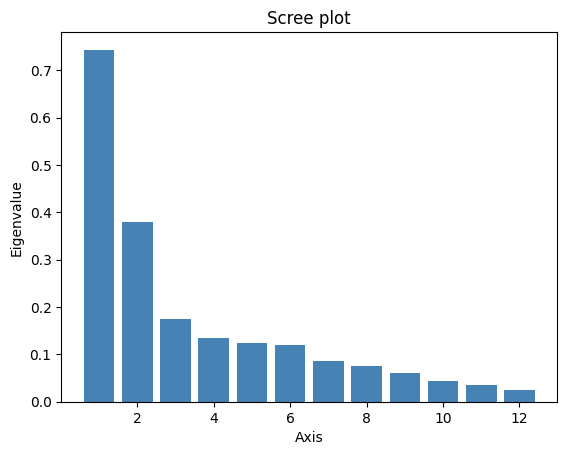

In [ ]:
#graphique des valeurs propres
acm.plot_eigenvalues()

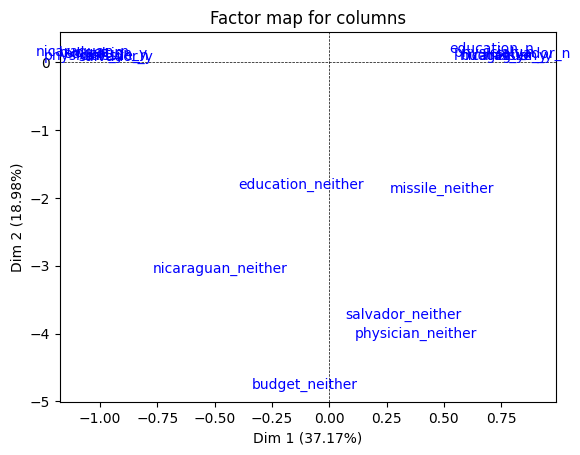

In [ ]:
#position des modalités dans le plan
acm.mapping_col(num_x_axis=1,num_y_axis=2,short_labels=False)

In [ ]:
#récup. des coordonnées des individus dans le plan
coord = acm.row_topandas().iloc[:,:2]

#verif. coordonnées factorielles des 5 premiers individus
coord.head(5)


,row_coord_dim1,row_coord_dim2
row0,-1.163452,0.183648
row1,0.893901,0.206759
row2,0.893901,0.206759
row3,0.893901,0.206759
row4,-0.141099,0.174007


<Axes: xlabel='row_coord_dim1', ylabel='row_coord_dim2'>

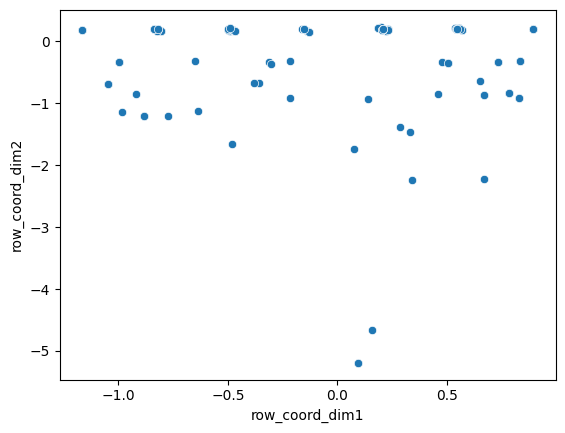

In [ ]:
#affichage dans le plan
import seaborn as sns
sns.scatterplot(coord,x='row_coord_dim1',y='row_coord_dim2')

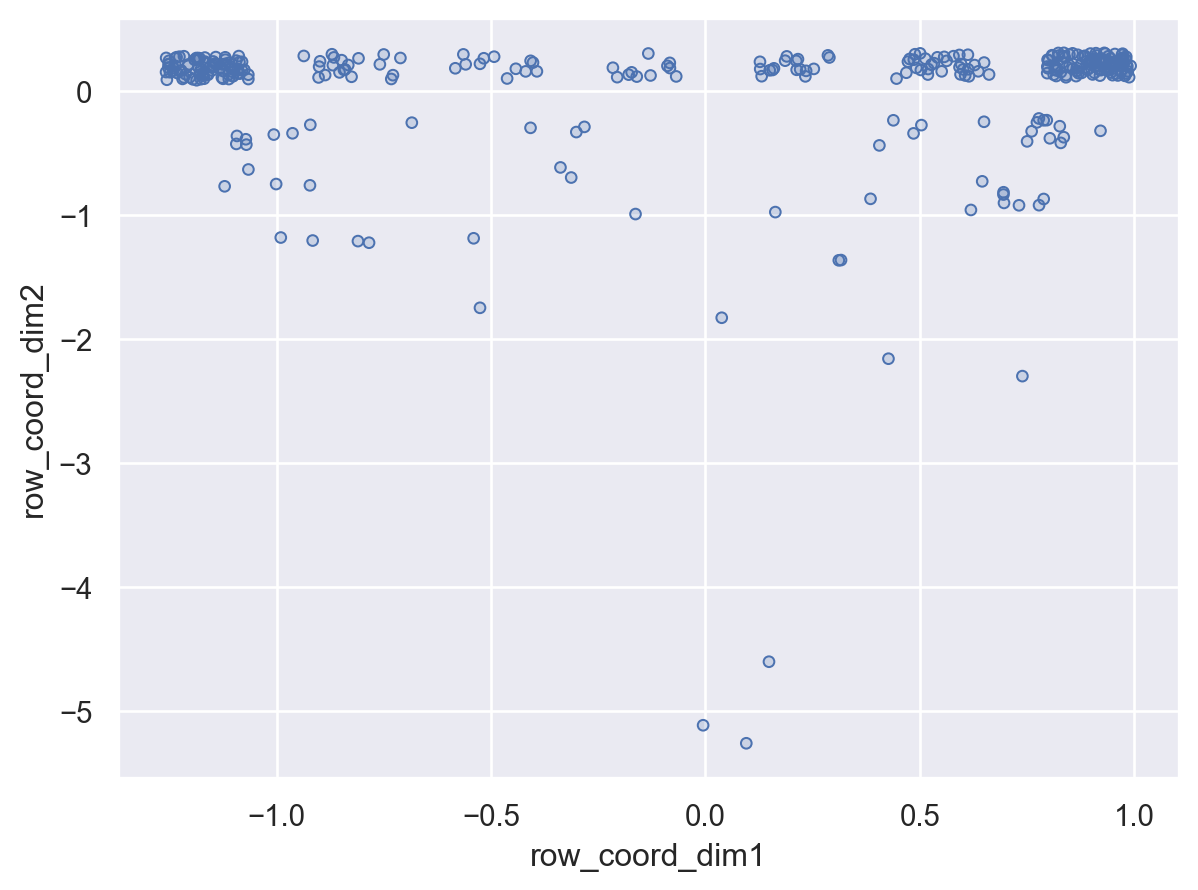

In [ ]:
#ajouter du jittering pour distinguer les points supperposés
import seaborn.objects as so
(
    so.Plot(data=coord,x='row_coord_dim1',y='row_coord_dim2')
    .add(so.Dots(),so.Jitter(x=0.2,y=0.2))
)

# K-Means sur facteurs

In [ ]:
#installer yellobrick si pas déjà fait (une seule fois)
#!pip install yellowbrick

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10),
                 timings=False)

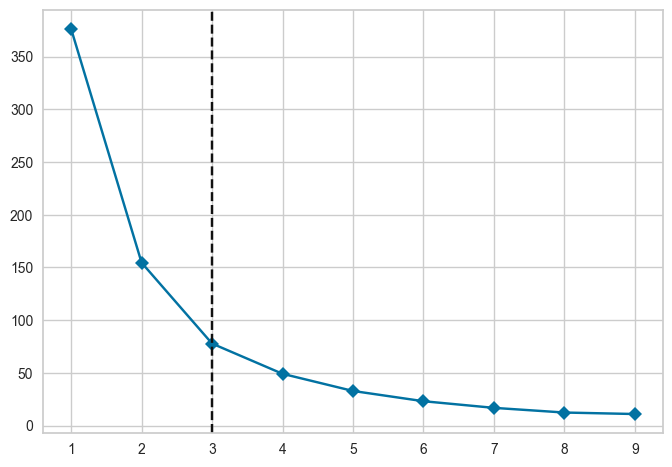

In [ ]:
#désactiver les warnings
import warnings
warnings.filterwarnings(action='ignore')

#librairie scikit-learn
from sklearn.cluster import KMeans

#utiliser yellowbrick pour identifier le "bon" nombre de clusters
from yellowbrick.cluster import KElbowVisualizer
coude = KElbowVisualizer(KMeans(),k=(1,10),metric='distortion',timings=False)
coude.fit(coord)

In [ ]:
#partition en 3 clusters
km = KMeans(n_clusters=3,random_state=0)
km.fit(coord)

#les labels
print(km.labels_)

[1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 2 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0
 2 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 2 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1
 2 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 2 0 1 0 1 1 2 1 0 0 1 1 0 0 1 0 0 2 1 1 1 1 1
 0 1 1 1 2 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0
 0 0]


In [ ]:
#effectifs par groupe
import numpy
print(numpy.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([180, 146,   9]))


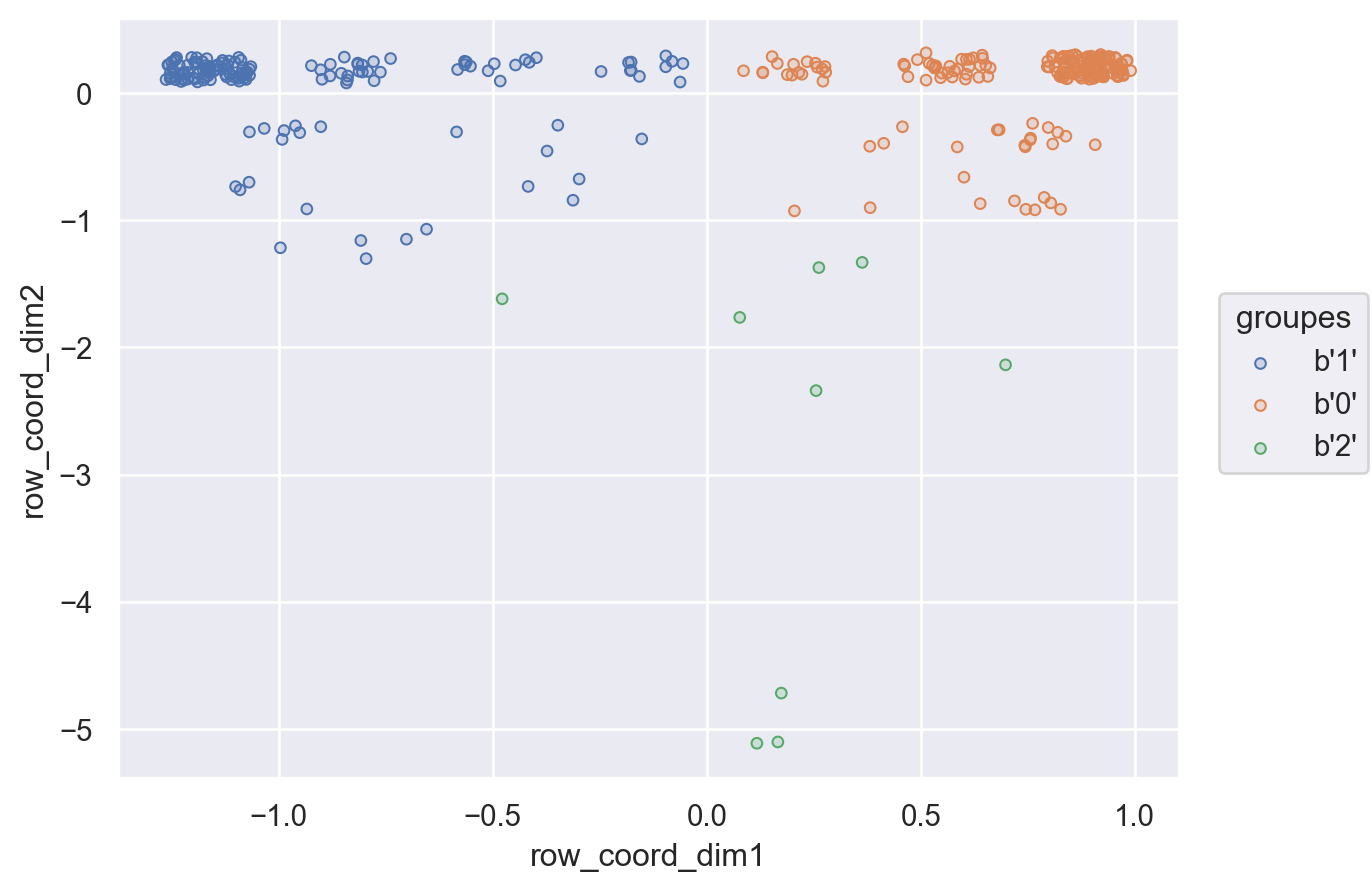

In [ ]:
#données "etiquetées" ppur graphique
lbl_coord = coord.copy()
lbl_coord['groupes'] = km.labels_.astype('S')

#graphique
(
    so.Plot(
        data=lbl_coord,x='row_coord_dim1',y='row_coord_dim2',color='groupes'
    )
    .add(so.Dots(),so.Jitter(x=0.2,y=0.2))
)

# Interprétation des groupes

In [ ]:
#croiser chaque variable avec les groupes
for v in vote.columns:
    print("{}<< {} >>".format('\n',v.upper()))
    print(pandas.crosstab(index=vote[v],columns=km.labels_,normalize='columns'))


<< BUDGET >>
col_0           0         1         2
budget                               
n        0.072222  0.821918  0.000000
neither  0.000000  0.013699  0.666667
y        0.927778  0.164384  0.333333

<< PHYSICIAN >>
col_0             0         1         2
physician                              
n          0.944444  0.136986  0.222222
neither    0.016667  0.006849  0.666667
y          0.038889  0.856164  0.111111

<< SALVADOR >>
col_0            0         1         2
salvador                              
n         0.894444  0.006849  0.333333
neither   0.022222  0.006849  0.444444
y         0.083333  0.986301  0.222222

<< NICARAGUAN >>
col_0              0         1         2
nicaraguan                              
n           0.027778  0.856164  0.111111
neither     0.005556  0.054795  0.444444
y           0.966667  0.089041  0.444444

<< MISSILE >>
col_0           0         1         2
missile                              
n        0.100000  0.917808  0.222222
neither  0.06111

# Pipeline

In [ ]:
#création d'un pipeline
from sklearn.pipeline import Pipeline

#enchaîner ACM et K-Means
wkf = Pipeline([('acm',MCA(n_components=2,var_labels=vote.columns)),
                ('km',KMeans(n_clusters=3,random_state=0))])

#apprentissage + création des groupes
clusters = wkf.fit_predict(vote.values)

#effectifs par groupe
print(numpy.unique(clusters,return_counts=True))

(array([0, 1, 2], dtype=int32), array([180, 146,   9]))


In [ ]:
#croisement avec l'approche pas-à-pas
pandas.crosstab(lbl_coord['groupes'],clusters)

col_0,0,1,2
groupes,,,
b'0',180,0,0
b'1',0,146,0
b'2',0,0,9


In [ ]:
#check -- version de scikit-learn
import sklearn
sklearn.__version__

'1.4.0'

In [ ]:
#sauvegarde du modèle
import pickle

#créer le fichier en écriture binaire
f = open("workflow.sav","wb")

#sérialisation
pickle.dump(wkf,f)

#ne pas oublier de ferme
f.close()